### Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Initial Data Exploration

In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# Unique Identifiers
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [10]:
# Statistical Summary
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,"4,766,729.25","5,150.54",2.97,1.29,1.81,0.69
std,"1,870,439.62","2,170.14",0.74,0.50,0.87,0.86
min,"1,750,000.00","1,650.00",1.00,1.00,1.00,0.00
25%,"3,430,000.00","3,600.00",2.00,1.00,1.00,0.00
50%,"4,340,000.00","4,600.00",3.00,1.00,2.00,0.00
75%,"5,740,000.00","6,360.00",3.00,2.00,2.00,1.00
max,"13,300,000.00","16,200.00",6.00,4.00,4.00,3.00


In [12]:
# categorical 
df.select_dtypes(include = ['object', 'category']).columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

### Categorical Analysis

In [13]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [14]:
df['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [15]:
df['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [16]:
df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [17]:
df['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [18]:
df['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

In [19]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [44]:
df['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

### Check for Missing Values

In [20]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Check for duplicates

In [23]:
df.duplicated().sum()

0

### Univariate Analysis

In [31]:
numerical_cols = df.select_dtypes(include=['int', 'float'])

In [33]:
categorical_cols = df.select_dtypes(include=['object', 'category'])

In [38]:
categorical_cols

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [40]:
numerical_cols

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


### Histograms

(array([ 61., 163., 139.,  89.,  46.,  25.,  13.,   4.,   1.,   4.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

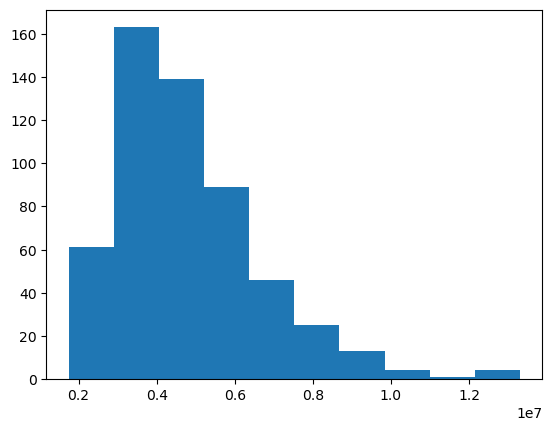

In [36]:
# Histogram 
plt.hist(df['price'])

(array([ 73., 198., 117.,  88.,  39.,  15.,   8.,   5.,   0.,   2.]),
 array([ 1650.,  3105.,  4560.,  6015.,  7470.,  8925., 10380., 11835.,
        13290., 14745., 16200.]),
 <BarContainer object of 10 artists>)

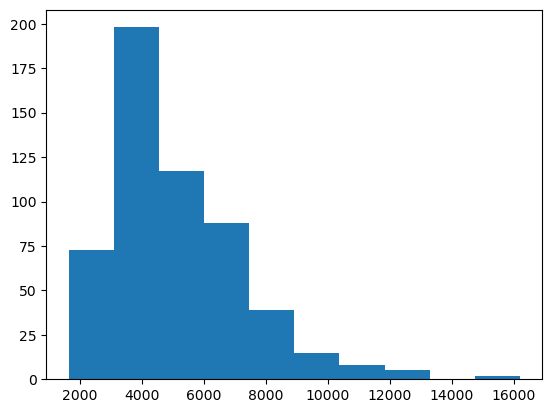

In [42]:
plt.hist(df['area'])

**Histograms are bad choice for Discrete data   
Create unncessary gaps between bars**

(array([  2.,   0., 136.,   0., 300.,   0.,  95.,   0.,  10.,   2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

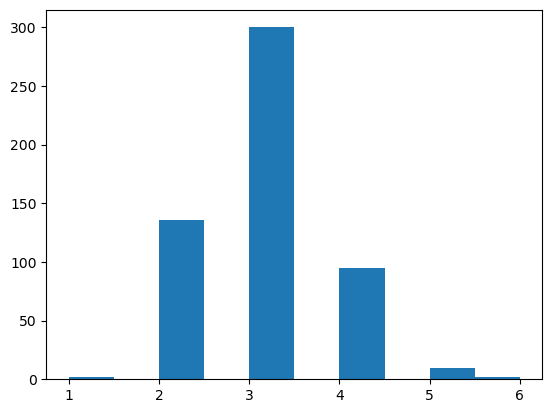

In [45]:
plt.hist(df['bedrooms']) 

**Histograms are not suitable for categorical data**

(array([354.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 191.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

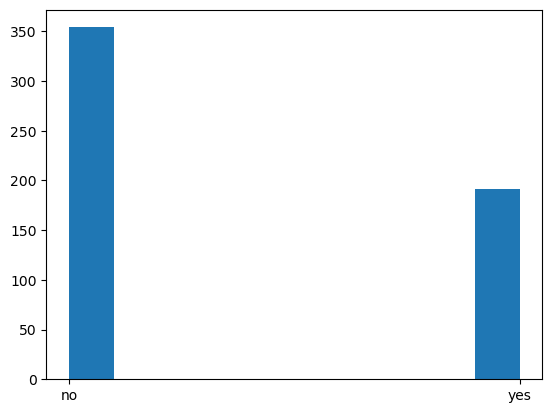

In [46]:
plt.hist(df['basement'])

### Density Plot
- **Used for Continuous Numerical Variables gives smooth curve**
- **Not good for categorical data, discrete data, and small datasets**
- **It can be used for comparison**

<Axes: xlabel='area', ylabel='Density'>

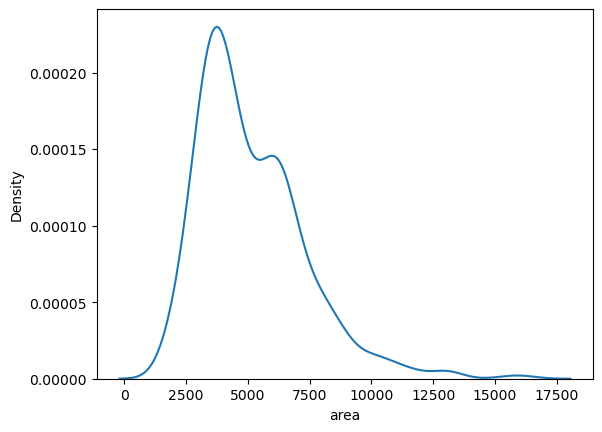

In [53]:
sns.kdeplot(df['area'])

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

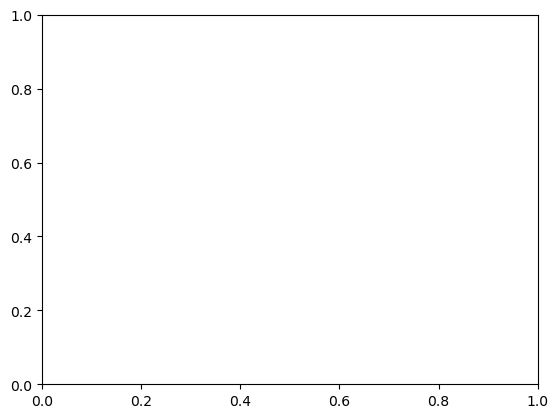

In [56]:
sns.kdeplot(df['furnishingstatus'])